In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(["PassengerId","Name"],axis = 1, inplace = True)

In [ ]:
for index, value in df["Sex"].items():
  if value == "male":
      df.at[index, "Sex"] = 1
  else:
    df.at[index,"Sex"] = 0

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Cabin = df["Cabin"]
Ticket = df["Ticket"]
df.drop(["Cabin","Ticket"],axis = 1, inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
y_label = df["Survived"]
df.drop(["Embarked","Survived"],axis = 1, inplace=True)


In [ ]:
print(df.head())
print(y_label.head())

   Pclass Sex   Age  SibSp  Parch     Fare
0       3   1  22.0      1      0   7.2500
1       1   0  38.0      1      0  71.2833
2       3   0  26.0      0      0   7.9250
3       1   0  35.0      1      0  53.1000
4       3   1  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
df.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
df.Age = df.Age.fillna(df.Age.mean())

In [ ]:
df["Age"].isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y_label,test_size=0.2)


#Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.8324022346368715

In [ ]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
y_test[:10]

15     1
238    0
5      0
821    1
759    1
214    0
352    0
361    0
502    0
752    0
Name: Survived, dtype: int64

In [ ]:
model.predict_proba(X_test[:10])

array([[0.1657647 , 0.8342353 ],
       [0.86265237, 0.13734763],
       [0.94074439, 0.05925561],
       [0.93890299, 0.06109701],
       [0.01220769, 0.98779231],
       [0.94794914, 0.05205086],
       [0.91889814, 0.08110186],
       [0.89287677, 0.10712323],
       [0.33399559, 0.66600441],
       [0.94245207, 0.05754793]])

#Using Decision Tree Classifier

In [ ]:
from sklearn import tree
model_2 = tree.DecisionTreeClassifier()

model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.8324022346368715

In [ ]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae,model.score(val_X,val_y))

In [ ]:
for max_leaf_nodes in [5, 50,60,75, 100,500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes}    Mean Absolute Error: {my_mae[0]}.  accuracy ={my_mae[1]}")

Max leaf nodes: 5    Mean Absolute Error: 0.16759776536312848.  accuracy =0.8324022346368715
Max leaf nodes: 50    Mean Absolute Error: 0.1452513966480447.  accuracy =0.8547486033519553
Max leaf nodes: 60    Mean Absolute Error: 0.15083798882681565.  accuracy =0.8491620111731844
Max leaf nodes: 75    Mean Absolute Error: 0.15083798882681565.  accuracy =0.8491620111731844
Max leaf nodes: 100    Mean Absolute Error: 0.16759776536312848.  accuracy =0.8324022346368715
Max leaf nodes: 500    Mean Absolute Error: 0.20670391061452514.  accuracy =0.7932960893854749
Max leaf nodes: 5000    Mean Absolute Error: 0.20670391061452514.  accuracy =0.7932960893854749


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(), df, y_label, cv=5)
scores, scores.mean()

(array([0.72067039, 0.78651685, 0.81460674, 0.76404494, 0.79775281]),
 0.7767183478752118)

#Using SVM

In [ ]:
from sklearn.svm import SVC
model_3 = SVC()

model_3.fit(X_train,y_train)


SVC()

In [ ]:
model.score(X_test,y_test)

0.8324022346368715

In [ ]:
model_31 = SVC(C=100)
model_31.fit(X_train,y_train)
model_31.score(X_test, y_test)

0.8324022346368715

#Feature Scaling

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
157,3,1,30.000000,0,0,8.0500
33,2,1,66.000000,0,0,10.5000
778,3,1,29.699118,0,0,7.7375
748,1,1,19.000000,1,0,53.1000
498,1,0,25.000000,1,2,151.5500


In [ ]:
mean = X_train.Age.mean()
std = X_train.Age.std()

mean_2 = X_train.Fare.mean()
std_2 = X_train.Fare.std()
mean, std


(29.591575925313943, 12.810092369790828)

In [ ]:
X_train_s = X_train.copy()

for index,value in X_train_s["Age"].items():
  X_train_s.at[index,"Age"] = (value-mean)/std
for index,value in X_train_s["Fare"].items():
  X_train_s.at[index,"Fare"] = (value-mean_2)/std_2

In [ ]:
(30-mean)/std

0.03188299216711468

In [ ]:
X_train_s.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
157,3,1,0.031883,0,0,-0.467479
33,2,1,2.842167,0,0,-0.419843
778,3,1,0.008395,0,0,-0.473555
748,1,1,-0.826815,1,0,0.408435
498,1,0,-0.358434,1,2,2.322614


In [ ]:
model_3.fit(X_train_s, y_train )
model_3.score(X_test, y_test)

0.6033519553072626

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(max_leaf_nodes= 50, n_estimators = 20, random_state=42)
model_4.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=50, n_estimators=20, random_state=42)

In [ ]:
model_4.score(X_test, y_test)

0.8435754189944135

In [ ]:
y_predicted = model_4.predict(X_test)


In [ ]:
def get_mae(max_leaf_nodes,estimate_number, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0, n_estimators= estimate_number)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return model.score(val_X,val_y)

In [ ]:
for max_leaf_nodes in [5, 50,500, 5000]:
  for estimate_number in [1,20,200,2000]:
    my_mae = get_mae(max_leaf_nodes,estimate_number, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes}    Estimate Number: {estimate_number}.  accuracy ={my_mae}")

Max leaf nodes: 5    Estimate Number: 1.  accuracy =0.8156424581005587
Max leaf nodes: 5    Estimate Number: 20.  accuracy =0.8268156424581006
Max leaf nodes: 5    Estimate Number: 200.  accuracy =0.8324022346368715
Max leaf nodes: 5    Estimate Number: 2000.  accuracy =0.8212290502793296
Max leaf nodes: 50    Estimate Number: 1.  accuracy =0.8212290502793296
Max leaf nodes: 50    Estimate Number: 20.  accuracy =0.8379888268156425
Max leaf nodes: 50    Estimate Number: 200.  accuracy =0.8324022346368715
Max leaf nodes: 50    Estimate Number: 2000.  accuracy =0.8324022346368715
Max leaf nodes: 500    Estimate Number: 1.  accuracy =0.7653631284916201
Max leaf nodes: 500    Estimate Number: 20.  accuracy =0.8044692737430168
Max leaf nodes: 500    Estimate Number: 200.  accuracy =0.7988826815642458
Max leaf nodes: 500    Estimate Number: 2000.  accuracy =0.7988826815642458
Max leaf nodes: 5000    Estimate Number: 1.  accuracy =0.7653631284916201
Max leaf nodes: 5000    Estimate Number: 20.

In [ ]:
for max_leaf_nodes in [40, 50, 60]:
  for estimate_number in [10,20,50,100]:
    my_mae = get_mae(max_leaf_nodes,estimate_number, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes}    Estimate Number: {estimate_number}.  accuracy ={my_mae}")

Max leaf nodes: 40    Estimate Number: 10.  accuracy =0.8379888268156425
Max leaf nodes: 40    Estimate Number: 20.  accuracy =0.8268156424581006
Max leaf nodes: 40    Estimate Number: 50.  accuracy =0.8212290502793296
Max leaf nodes: 40    Estimate Number: 100.  accuracy =0.8324022346368715
Max leaf nodes: 50    Estimate Number: 10.  accuracy =0.8212290502793296
Max leaf nodes: 50    Estimate Number: 20.  accuracy =0.8379888268156425
Max leaf nodes: 50    Estimate Number: 50.  accuracy =0.8212290502793296
Max leaf nodes: 50    Estimate Number: 100.  accuracy =0.8324022346368715
Max leaf nodes: 60    Estimate Number: 10.  accuracy =0.8268156424581006
Max leaf nodes: 60    Estimate Number: 20.  accuracy =0.8268156424581006
Max leaf nodes: 60    Estimate Number: 50.  accuracy =0.8212290502793296
Max leaf nodes: 60    Estimate Number: 100.  accuracy =0.8268156424581006


Max leaf node = 50, n_estimators = 20

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[93, 15],
       [18, 53]])

Text(45.722222222222214, 0.5, 'Truth')

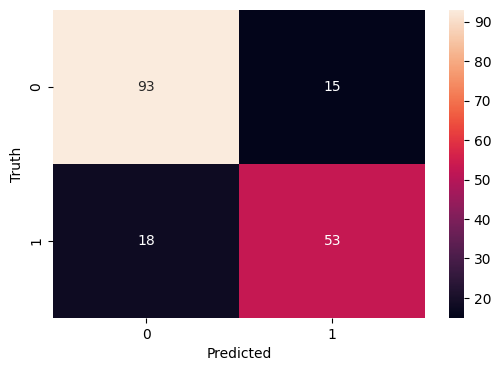

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(), df, y_label, cv=5)
scores

array([0.7150838 , 0.80337079, 0.80337079, 0.75842697, 0.81460674])

In [ ]:
scores.mean()

0.7789718159563115

#Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression()
model_5.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_5.score(X_test,y_test)

0.8044692737430168

In [ ]:
y_pred = model_5.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8044692737430168


#Averaging model(1-4)

In [ ]:
lst = [1,2]
pst = [3,4]
ast = [lst,pst]
ast

[[1, 2], [3, 4]]

In [ ]:
model1_predictions = model.predict(X_test)
model2_predictions = model_2.predict(X_test)
model3_predictions = model_3.predict(X_test)
model4_predictions = model_4.predict(X_test)
model5_predictions = model_5.predict(X_test)


In [ ]:
from collections import Counter

# Combine the predictions from different models into a list
all_predictions = [model1_predictions, model2_predictions, model3_predictions,model4_predictions, model5_predictions]

# Initialize an empty list for ensemble predictions
ensemble_predictions = []

# Iterate through each data point and take a majority vote
for predictions in zip(*all_predictions):
    majority_vote = Counter(predictions).most_common(1)[0][0]
    ensemble_predictions.append(majority_vote)

print("Ensemble Predictions for Classification:")
print(ensemble_predictions)


Ensemble Predictions for Classification:
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, ensemble_predictions)
print(acc)

0.8044692737430168


#Preparing test output

In [ ]:
df2 = pd.read_csv("test.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
passengerId= df2["PassengerId"]

In [ ]:
df2.drop(["PassengerId","Name"],axis = 1, inplace = True)

for index, value in df2["Sex"].items():
  if value == "male":
      df2.at[index, "Sex"] = 1
  else:
    df2.at[index,"Sex"] = 0

df2.drop(["Cabin","Ticket"],axis = 1, inplace = True)
df2.drop(["Embarked"],axis = 1, inplace=True)


In [ ]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


In [ ]:
df2.Age = df2.Age.fillna(df2.Age.mean())

In [ ]:
df2.Fare = df2.Fare.fillna(df2.Fare.mean())

In [ ]:
df2.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [ ]:
model1_predictions = model.predict(df2)
model2_predictions = model_2.predict(df2)
model3_predictions = model_3.predict(df2)
model4_predictions = model_4.predict(df2)
model5_predictions = model_5.predict(df2)

In [ ]:
from collections import Counter

# Combine the predictions from different models into a list
all_predictions = [model1_predictions, model2_predictions, model3_predictions,model4_predictions, model5_predictions]

# Initialize an empty list for ensemble predictions
ensemble_predictions = []

# Iterate through each data point and take a majority vote
for predictions in zip(*all_predictions):
    majority_vote = Counter(predictions).most_common(1)[0][0]
    ensemble_predictions.append(majority_vote)

print("Ensemble Predictions for Classification:")
print(ensemble_predictions)

Ensemble Predictions for Classification:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0

In [ ]:
data = {
    'PassengerId': passengerId,
    'Survived': ensemble_predictions
}

In [ ]:
submission = pd.DataFrame(data)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.shape

(418, 2)

In [ ]:
submission.to_csv("Output.csv", index = False)

In [ ]:
arr = model_4.predict(df2)

In [ ]:
data2 = {
    'PassengerId': passengerId,
    'Survived': arr
}

In [ ]:
submission2 = pd.DataFrame(data2)
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission2.to_csv("Output2.csv", index = False)